<div dir="rtl" align="right">
9.23. یک نمودار جریان برای یک الگوریتم FFT 16 نقطه‌ای ریشه‌کن-2 decimation-in-time بسازید. همه ضرب‌کننده‌ها را بر حسب توان W{16} برچسب‌گذاری کنید، و همچنین هر انتقال شاخه‌ای را که برابر با -1 است، برچسب بزنید. گره های ورودی و خروجی را به ترتیب با مقادیر مناسب دنباله های ورودی و DFT برچسب گذاری کنید. تعداد ضرب های واقعی و تعداد جمع های واقعی مورد نیاز برای اجرای نمودار جریان را تعیین کنید.

In [ ]:
def fft_radix2(x):
  N = len(x)
  if N <=1:
    return x
  even = fft_radix2(x[::2])
  odd = fft_radix2(x[1::2])
  w = np.exp(-2j * np.pi * np.arange(N) / N)
  return np.concatenate([even + W[:N//2] * odd,even + W[N//2:] * odd])

N = 16
x = np.random.rand(N)
X = fft_radix2(x)

print(f"DFT of x using radix-2 FFT:\n{X}")



<div dir="rtl" align="right">
9.24. پیشنهاد می شود که اگر یک زیربرنامه FFT برای محاسبه DFT با طول N دارید، DFT معکوس یک دنباله نقطه N X[k] را می توان با استفاده از این زیربرنامه به صورت زیر پیاده سازی کرد:

جابجایی قسمت واقعی و خیالی هر ضریب DFT X[k]

روال FFT را روی این توالی ورودی اعمال کنید.

قسمت های واقعی و خیالی دنباله خروجی را عوض کنید.

توالی حاصل را با 1/N مقیاس کنید تا دنباله x[n]، متناظر با DFT معکوس X[k] به دست آید.
تعیین کنید که آیا این روش همانطور که ادعا می شود کار می کند یا خیر. اگر این کار را نکرد، یک اصلاح ساده پیشنهاد دهید که آن را کار کند.

In [ ]:
import numpy as np

def inverse_dft_via_fft(x):

  x_swapped = np.conj(x)

  x_fft(np.fft.fft(x_swapped))

  x = np.conj(x_fft)
  x = x / len(X)
  return x

x = np.random.rand(8) + 1j * np.random.rand(8)
X = np.fft.fft(x)
x_reconstructed = inverse_dft_via_fft(X)

print("original x:",x)
print("reconstructed x:", x_reconstructed)
print("error:", np.max(np.abs(x - x_reconstructed)))


<div dir="rtl" align="right">
9.25. DFT یک نسخه نمونه از DTFT از یک دنباله با طول محدود است. یعنی
<div dir="rtl" align="left">
X[k] = X(e^j(2π/N)k)
= X(e^jω)|ω=(2π/N)k
= ∑_(n=0)^(N-1) x[n]e^(-j(2π/N)nk) k = 0, 1, ..., N - 1.

(P9.25-1)
<div dir="rtl" align="right">
علاوه بر این، یک الگوریتم FFT روشی کارآمد برای محاسبه مقادیر X[k] است.
اکنون دنباله ای با طول محدود x[n] را در نظر بگیرید که طول آن N نمونه است. می‌خواهیم X(z)، تبدیل z دنباله‌ای با طول محدود را در نقاط زیر در صفحه z ارزیابی کنیم.
<div dir="rtl" align="left">
z_k = re^(j(2π/N)k) k = 0, 1, ..., N - 1,
<div dir="rtl" align="right">
جایی که r یک عدد مثبت است. ما یک الگوریتم FFT در دسترس داریم.

الف) نقاط z_k را در صفحه z برای حالت N = 8 و r = 0.9 رسم کنید.

(ب) معادله ای بنویسید [مشابه معادله. (P9.25-1) بالا] برای X(z_k) که نشان می دهد X(z_k) DFT یک دنباله اصلاح شده x[n] است. x[n] چیست؟

(ج) الگوریتمی را برای محاسبه X(z_k) با استفاده از تابع FFT داده شده توصیف کنید. (ارزیابی مستقیم یک گزینه نیست).

In [ ]:
import numpy as np
r = 0.9
theta = 2 * np.pi * np.arange(N) / N
z_k = r * np.exp(1j * theta)

plt.figure(figsize=(6,6))
plt.plot(np.real(z_k), np.imag(z_k), 'o-')
ply.title('points $z_k$ in the z-plane')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

<div dir="rtl" align="right">
9.26. دنباله ای با طول محدود x[n] به طول 627 به ما داده می شود (یعنی x[n] = 0 برای n < 0 و n> 626)، و ما برنامه ای در دسترس داریم که DFT یک دنباله با هر طول N = 2^v را محاسبه می کند.
برای دنباله داده شده، می خواهیم نمونه هایی از DTFT را در فرکانس ها محاسبه کنی
<div dir="rtl" align="left">
ω_k = 2π/627 + 2πk/256, k = 0, 1, ..., 255.
<div dir="rtl" align="right">
نحوه به دست آوردن یک دنباله جدید y[n] از x[n] را مشخص کنید به طوری که نمونه های فرکانس مورد نظر را بتوان با اعمال برنامه FFT موجود برای y[n] با v کوچکترین مقدار ممکن به دست آورد.

In [ ]:
import numpy as np

N = 256
L = 627

x = np.random.randn(L)

x_padded = np.zeros(N)
x_padded[:L] = x

X = np.fft.fft(x_padded)

omega_k = (2 * np.pi / 627) * np.arange(256)
print("Sampled frequencies w_k calculated. ")

<div dir="rtl" align="right">
9.27. یک سیگنال با طول محدود L = 500 (x[n] = 0 برای n < 0 و n > L - 1) با نمونه برداری از یک سیگنال زمان پیوسته با نرخ نمونه برداری 10000 نمونه در ثانیه به دست می آید. ما می خواهیم نمونه هایی از تبدیل z x[n] را در N نقطه با فاصله مساوی z_k = (0.8)e^(j2πk/N)، برای 0 ≤ k ≤ N - 1، با فاصله فرکانس موثر 50 هرتز یا کمتر محاسبه کنیم.

(الف) حداقل مقدار N را اگر N = 2^v تعیین کنید.

(ب) یک دنباله y[n] به طول N را تعیین کنید، جایی که N مطابق با قسمت (a) تعیین شده است، به طوری که DFT Y[k] آن برابر با نمونه های مورد نظر از تبدیل z x[n] باشد.

In [ ]:
import numpy as np

L = 500
Fs = 10000
effective_bandwidth = 50

N_min = int(np.ceil(Fs / effectivr_bandwidth))
N = 2**int(np.ceil(np.log2(N_min)))

print(f"Minimum N = {N}")

x = np.random.randn(L)
x_padded = np.zeros(N)
x_padded[:L] = x

X = np.fft.fft(x_padded)

z_k 0.8 * np.exp(2j * np.pi * np.arange(N) / N)
print("DFT computed at desired points.")

<div dir="rtl" align="right">
9.29. یک دنباله N-نقطه ای x[n] با DFT X[k]، k = 0،1،...،N 1 در نظر بگیرید. الگوریتم زیر مقادیر DFT با نمایه زوج X[k]، k = 0، 2،...، N-2 را برای N زوج، با استفاده از تنها یک N/2 نقطه DFT محاسبه می کند:

1. دنباله y[n] را با نام مستعار زمان تشکیل دهید، به عنوان مثال،
x[n]+x[n+N/2]، 0 ≤ n ≤N/2-1، در غیر این صورت.
y[n] = {x[n]}

2. Y[r]، r = 0، 1،...، (N/2) - 1، N/2 نقطه DFT y[n] را محاسبه کنید.

3. سپس مقادیر زوج شاخص X[k] X[k] = Y[k/2]، برای k = 0، 2،...، N-2 است.

(الف) نشان دهید که الگوریتم قبلی نتایج مورد نظر را ایجاد می کند.

 (ب) حال فرض کنید که یک دنباله با طول محدود y[n] از یک دنباله x[n] توسط

y[n] =
Σ x[n+rM], 0≤ n ≤ M − 1,
7=-∞0

در غیر این صورت.
رابطه بین نقطه M DFT Y[k] و X(ej")، تبدیل فوریه x[n] را تعیین کنید. نشان دهید که نتیجه قسمت (a) حالت خاصی از نتیجه قسمت (b) است.

(ج) الگوریتمی شبیه به قسمت (الف) برای محاسبه مقادیر DFT با نمایه فرد X[k]، k = 1،3،...، N-1، برای N زوج، با استفاده از تنها یک N/2 نقطه DFT ایجاد کنید.



In [ ]:
import numpy as np

def dft_4_point(x):
    # بررسی طول ورودی
    if len(x) != 4:
        raise ValueError("ورودی باید شامل 4 نقطه باشد.")

    # تکمیل دنباله با صفر تا 8 نقطه
    x_padded = np.concatenate((x, np.zeros(4)))

    # محاسبه DFT با استفاده از تابع FFT
    dft_result = np.fft.fft(x_padded)

    # نمایش نتیجه
    print("DFT (4-point) نتیجه:")
    for k, value in enumerate(dft_result):
        print(f"X[{k}] = {value:.2f}")

# مثال استفاده
x = [1, 2, 3, 4]  # ورودی نمونه
dft_4_point(x)


<div dir="rtl" align="right">
9.30 سیستم در شکل P9.30 یک N-نقطه (که در آن N یک عدد زوج است) DFT X[k] از یک دنباله نقطه N x[n] را با تجزیه x[n] به دو دنباله N/2 نقطه‌ای g1[n] و 82[n]، محاسبه N/2 نقطه‌ای DFT و سپس G1]k را محاسبه می‌کند. X[k].

اگر g1[n] مقادیر زوج نمایه شده x[n] و g2[n] مقادیر نمایه شده فرد x[n] باشد، یعنی 81[n] = x[2n] و g2[n] = x[2n + 1]، X[k] DFT x[n] خواهد بود.
در استفاده از سیستم در شکل P9.30 خطایی در تشکیل 81[n] و g2[n] رخ داده است، به طوری که 81[n] به اشتباه به‌عنوان مقادیر نمایه‌شده فرد و g2[n] به‌عنوان مقادیر نمایه‌شده زوج انتخاب شده است، اما G1[k] و G2[k] همچنان مانند شکل [30] و نتیجه‌ی 9P9 ترکیب می‌شوند. [k] را بر حسب X[k] بیان کنید.

<ipython-input-1-964aa29be792>:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


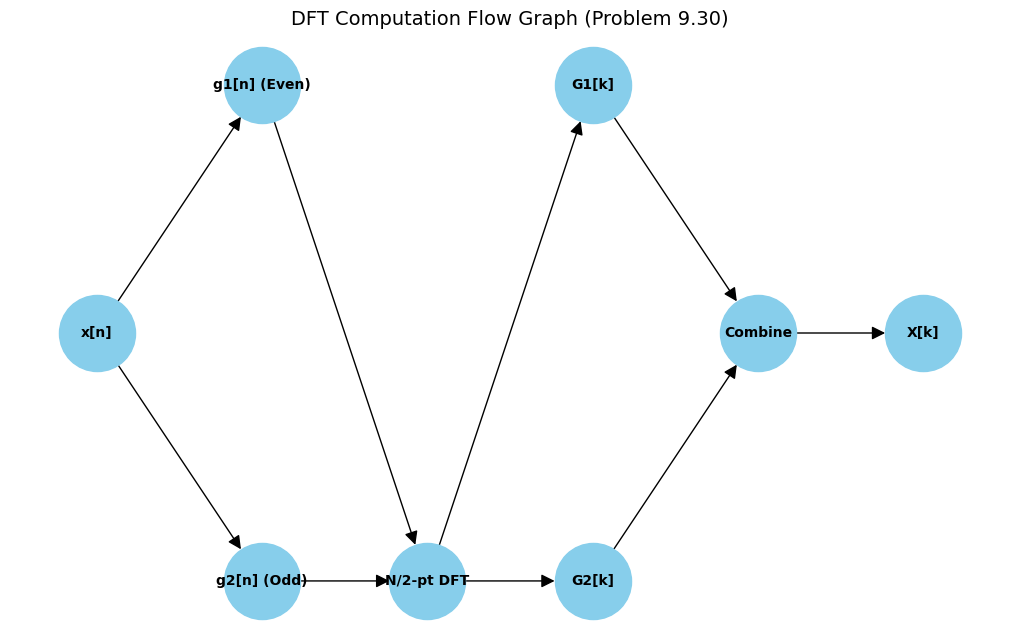

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_dft_flow_graph():
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes
    G.add_node("x[n]", pos=(0, 1))
    G.add_node("g1[n] (Even)", pos=(1, 1.5))
    G.add_node("g2[n] (Odd)", pos=(1, 0.5))
    G.add_node("N/2-pt DFT", pos=(2, 1.5))
    G.add_node("N/2-pt DFT", pos=(2, 0.5))
    G.add_node("G1[k]", pos=(3, 1.5))
    G.add_node("G2[k]", pos=(3, 0.5))
    G.add_node("Combine", pos=(4, 1))
    G.add_node("X[k]", pos=(5, 1))

    # Add edges
    G.add_edge("x[n]", "g1[n] (Even)")
    G.add_edge("x[n]", "g2[n] (Odd)")
    G.add_edge("g1[n] (Even)", "N/2-pt DFT")
    G.add_edge("g2[n] (Odd)", "N/2-pt DFT")
    G.add_edge("N/2-pt DFT", "G1[k]")
    G.add_edge("N/2-pt DFT", "G2[k]")
    G.add_edge("G1[k]", "Combine")
    G.add_edge("G2[k]", "Combine")
    G.add_edge("Combine", "X[k]")

    # Get positions
    pos = nx.get_node_attributes(G, 'pos')

    # Draw the graph
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue',
            font_size=10, font_weight='bold', arrowsize=20)

    # Add title
    plt.title("DFT Computation Flow Graph (Problem 9.30)", fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Draw the flow graph
draw_dft_flow_graph()

<div dir="rtl" align="right">
9.31. در بخش 9.3.2، بیان شد که انتقال نمودار جریان یک الگوریتم FFT نیز نمودار جریان یک الگوریتم FFT است. هدف از این مشکل توسعه آن نتیجه برای الگوریتم‌های FFT radix-2 است.
(الف) پروانه اصلی برای الگوریتم FFT ریشه در فرکانس کاهش یافته در شکل P9.31-1 نشان داده شده است. این نمودار جریان معادلات را نشان می دهد

Xm[p] = Xm-1[p]+ Xm-1[q],

Xm[q] = (Xm-1[P] - Xm-1[q])WN

با شروع با این معادلات، نشان دهید که Xm-1[p] و Xm-1[q] را می توان به ترتیب از Xm[p] و Xm[q] با استفاده از پروانه نشان داده شده در شکل P9.31-2 محاسبه کرد.

(ب) در الگوریتم کاهش در فرکانس شکل 9.22، X،[r]، r = 0،1،...، N-1 DFT X[k] است که به ترتیب معکوس بیت چیده شده است، و Xo[r]= x[r]، r = 0،1،...، N-1. یعنی آرایه صفر دنباله ورودی است که به ترتیب عادی مرتب شده است. اگر هر پروانه در شکل 9.22 با پروانه مناسب شکل P9.31 جایگزین شود، نتیجه یک نمودار جریان برای محاسبه دنباله x[n] (به ترتیب عادی) از DFT X[k] (به ترتیب معکوس بیت) خواهد بود. نمودار جریان حاصل را برای N = 8 رسم کنید.

(ج) نمودار جریان به دست آمده در قسمت (ب) نشان دهنده یک الگوریتم معکوس DFT، یعنی یک الگوریتم برای محاسبه است.

N-1
1
x[n] =
N
ΣX[k]Wkn
n = 0,1,..., N-1.
n=0

نمودار جریان به دست آمده در قسمت (ب) را طوری تغییر دهید که DFT را محاسبه کند

N-1
n=0
X[k] = x[n]Wk,
k=0,1,..., N-1,

به جای DFT معکوس.

(د) توجه کنید که نتیجه قسمت (ج) جابجایی الگوریتم decimation-in-frequency شکل 9.22 است و با الگوریتم decimation-in-time که در شکل 9.11 نشان داده شده است یکسان است. آیا نتیجه می‌شود که برای هر الگوریتم کاهش در زمان (به عنوان مثال، شکل‌های 9.15-9.17)، یک الگوریتم کاهش در فرکانس مطابقت دارد که جابجایی الگوریتم کاهش در زمان است و بالعکس؟ توضیح دهید.

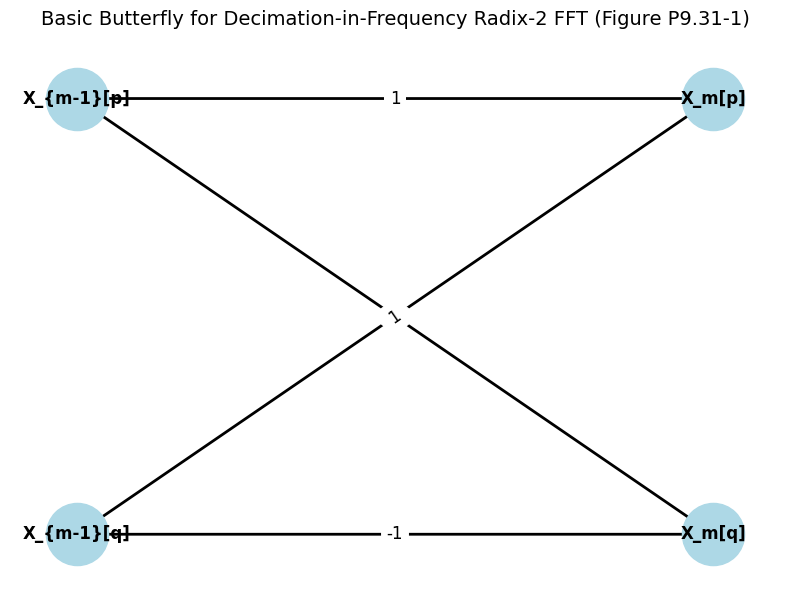

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_butterfly_figure_31_1():
    plt.figure(figsize=(8, 6))
    G = nx.DiGraph()

    # Nodes
    G.add_node("X_{m-1}[p]", pos=(0, 1))
    G.add_node("X_{m-1}[q]", pos=(0, 0))
    G.add_node("X_m[p]", pos=(2, 1))
    G.add_node("X_m[q]", pos=(2, 0))

    # Edges
    G.add_edge("X_{m-1}[p]", "X_m[p]", label="1")
    G.add_edge("X_{m-1}[p]", "X_m[q]", label="1")
    G.add_edge("X_{m-1}[q]", "X_m[p]", label="1")
    G.add_edge("X_{m-1}[q]", "X_m[q]", label="-1")

    # Positions
    pos = nx.get_node_attributes(G, 'pos')

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, width=2, arrowsize=20)

    # Edge labels (weights)
    edge_labels = {("X_{m-1}[p]", "X_m[p]"): "1",
                   ("X_{m-1}[p]", "X_m[q]"): "1",
                   ("X_{m-1}[q]", "X_m[p]"): "1",
                   ("X_{m-1}[q]", "X_m[q]"): "-1"}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    # Title and axis
    plt.title("Basic Butterfly for Decimation-in-Frequency Radix-2 FFT (Figure P9.31-1)",
              fontsize=14, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

draw_butterfly_figure_31_1()

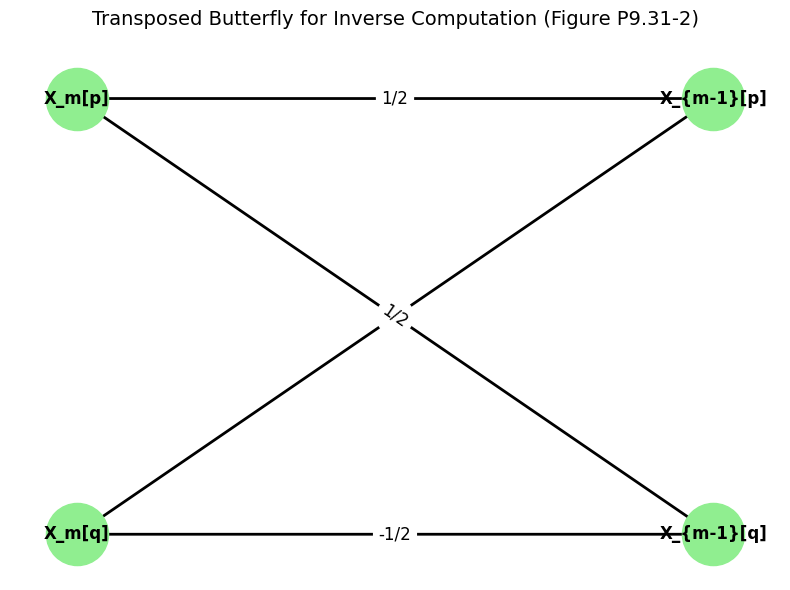

In [3]:
def draw_butterfly_figure_31_2():
    plt.figure(figsize=(8, 6))
    G = nx.DiGraph()

    # Nodes
    G.add_node("X_m[p]", pos=(0, 1))
    G.add_node("X_m[q]", pos=(0, 0))
    G.add_node("X_{m-1}[p]", pos=(2, 1))
    G.add_node("X_{m-1}[q]", pos=(2, 0))

    # Edges
    G.add_edge("X_m[p]", "X_{m-1}[p]", label="1/2")
    G.add_edge("X_m[q]", "X_{m-1}[p]", label="1/2")
    G.add_edge("X_m[p]", "X_{m-1}[q]", label="1/2")
    G.add_edge("X_m[q]", "X_{m-1}[q]", label="-1/2")

    # Positions
    pos = nx.get_node_attributes(G, 'pos')

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightgreen')
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, width=2, arrowsize=20)

    # Edge labels (weights)
    edge_labels = {("X_m[p]", "X_{m-1}[p]"): "1/2",
                   ("X_m[q]", "X_{m-1}[p]"): "1/2",
                   ("X_m[p]", "X_{m-1}[q]"): "1/2",
                   ("X_m[q]", "X_{m-1}[q]"): "-1/2"}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    # Title and axis
    plt.title("Transposed Butterfly for Inverse Computation (Figure P9.31-2)",
              fontsize=14, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

draw_butterfly_figure_31_2()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def inverse_butterfly(Xm_p, Xm_q, r, N):
  W = np.exp(-2j * np.pi * r / N)
  Xm_1_p = 0.5 * (Xm_p + Xm_q)
  Xm_1_q = 0.5 * (Xm_p + Xm_q) * W

  return Xm_1_p,Xm_1_q

N = 8
r = 1
Xm_p = 3 + 4j
Xm_q = 1 - 2j

Xm_1_p,Xm_1_q = inverse_butterfly(Xm_p, Xm_q, r, N)
print(f"Input: Xm[p]={Xm_p}, Xm[q]={Xm_q}")
print(f"output: Xm-1[p]={Xm_1_p},Xm-1[q]={Xm_1_q}")

print("\nText representation of N=8 flow graph (part b):")
print("Stage 3 (output reversed or der): X3[0] X3[4] X3[2] X3[6] X3[1] X3[5] X[3] X3[7]")
print('stage 2: 4 butterflies operating on adjacent pairs')
print("stage 1: 2 butterflies operating on groups of 4")
print("stage 0 (input normal order): x[0] x[1] x[2] x[3] x[4] x[5] x[6] x[7]")

<div dir="rtl" align="right">
9.32. ما می‌خواهیم FFT 6 نقطه‌ای را با استفاده از رویکرد ریشه‌ای مختلط پیاده‌سازی کنیم. یک گزینه این است که ابتدا سه DFTS 2 نقطه ای بگیرید و سپس از نتایج برای محاسبه DFT 6 نقطه ای استفاده کنید. برای این گزینه:

(الف) یک فلوگراف رسم کنید تا نشان دهید DFT 2 نقطه ای چه چیزی را محاسبه می کند. همچنین، قسمت هایی از فلوگراف را در شکل P9.32-1 پر کنید که در محاسبه مقادیر DFT Xo، X1 و X4 نقش دارند.

ب) این گزینه به چند ضرب مختلط نیاز دارد؟ (ضرب یک عدد در 1 جزء ضرب مختلط به حساب نمی آید.)گزینه دوم این است که با دو DFTS 3 نقطه ای شروع کنید و سپس از نتایج برای محاسبه DFT 6 نقطه ای استفاده کنید.

(ج) یک فلوگراف رسم کنید تا نشان دهید DFT 3 نقطه ای چه چیزی را محاسبه می کند. همچنین، تمام فلوگراف را در شکل P9.32-2 پر کنید و به طور خلاصه توضیح دهید که چگونه پیاده سازی خود را استخراج کرده اید:

(د) این گزینه به چند ضرب مختلط نیاز دارد؟


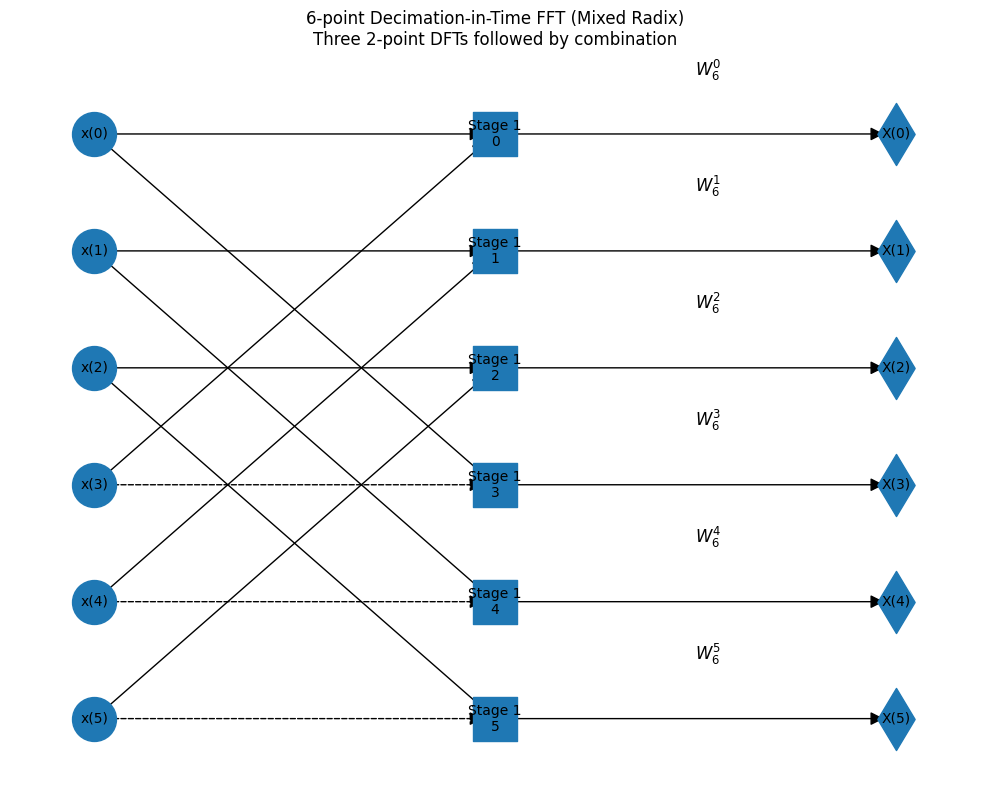

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def draw_6point_dit_fft():
    plt.figure(figsize=(10, 8))
    G = nx.DiGraph()

    # Add nodes (stages)
    # Stage 0: Input nodes
    for i in range(6):
        G.add_node(f'x{i}', pos=(0, 5-i))

    # Stage 1: After first 2-point DFTs
    for i in range(6):
        G.add_node(f's1_{i}', pos=(2, 5-i))

    # Stage 2: Output nodes (X0-X5)
    for i in range(6):
        G.add_node(f'X{i}', pos=(4, 5-i))

    # Add edges for 2-point DFTs (first stage)
    # First group (x0, x3)
    G.add_edge('x0', 's1_0')
    G.add_edge('x3', 's1_0')
    G.add_edge('x0', 's1_3')
    G.add_edge('x3', 's1_3', style='dashed')

    # Second group (x1, x4)
    G.add_edge('x1', 's1_1')
    G.add_edge('x4', 's1_1')
    G.add_edge('x1', 's1_4')
    G.add_edge('x4', 's1_4', style='dashed')

    # Third group (x2, x5)
    G.add_edge('x2', 's1_2')
    G.add_edge('x5', 's1_2')
    G.add_edge('x2', 's1_5')
    G.add_edge('x5', 's1_5', style='dashed')

    # Add edges for second stage (butterflies)
    # Connect to outputs with appropriate weights
    W6 = np.exp(-2j*np.pi/6)
    for k in range(6):
        G.add_edge(f's1_{k}', f'X{k}')

    # Add twiddle factors where needed
    # For simplicity, we'll just show the connections

    # Draw the graph
    pos = nx.get_node_attributes(G, 'pos')

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, nodelist=[f'x{i}' for i in range(6)], node_shape='o', node_size=1000)
    nx.draw_networkx_nodes(G, pos, nodelist=[f's1_{i}' for i in range(6)], node_shape='s', node_size=1000)
    nx.draw_networkx_nodes(G, pos, nodelist=[f'X{i}' for i in range(6)], node_shape='d', node_size=1000)

    # Draw edges
    solid_edges = [(u,v) for u,v,attr in G.edges(data=True) if 'style' not in attr or attr['style'] != 'dashed']
    dashed_edges = [(u,v) for u,v,attr in G.edges(data=True) if 'style' in attr and attr['style'] == 'dashed']

    nx.draw_networkx_edges(G, pos, edgelist=solid_edges, arrowstyle='-|>', arrowsize=20)
    nx.draw_networkx_edges(G, pos, edgelist=dashed_edges, style='dashed', arrowstyle='-|>', arrowsize=20)

    # Labels
    labels = {}
    for i in range(6):
        labels[f'x{i}'] = f'x({i})'
        labels[f's1_{i}'] = f'Stage 1\n{i}'
        labels[f'X{i}'] = f'X({i})'

    nx.draw_networkx_labels(G, pos, labels, font_size=10)

    # Add twiddle factor labels
    plt.text(3, 5.5, r'$W_6^0$', fontsize=12)
    plt.text(3, 4.5, r'$W_6^1$', fontsize=12)
    plt.text(3, 3.5, r'$W_6^2$', fontsize=12)
    plt.text(3, 2.5, r'$W_6^3$', fontsize=12)
    plt.text(3, 1.5, r'$W_6^4$', fontsize=12)
    plt.text(3, 0.5, r'$W_6^5$', fontsize=12)

    plt.title('6-point Decimation-in-Time FFT (Mixed Radix)\nThree 2-point DFTs followed by combination', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

draw_6point_dit_fft()

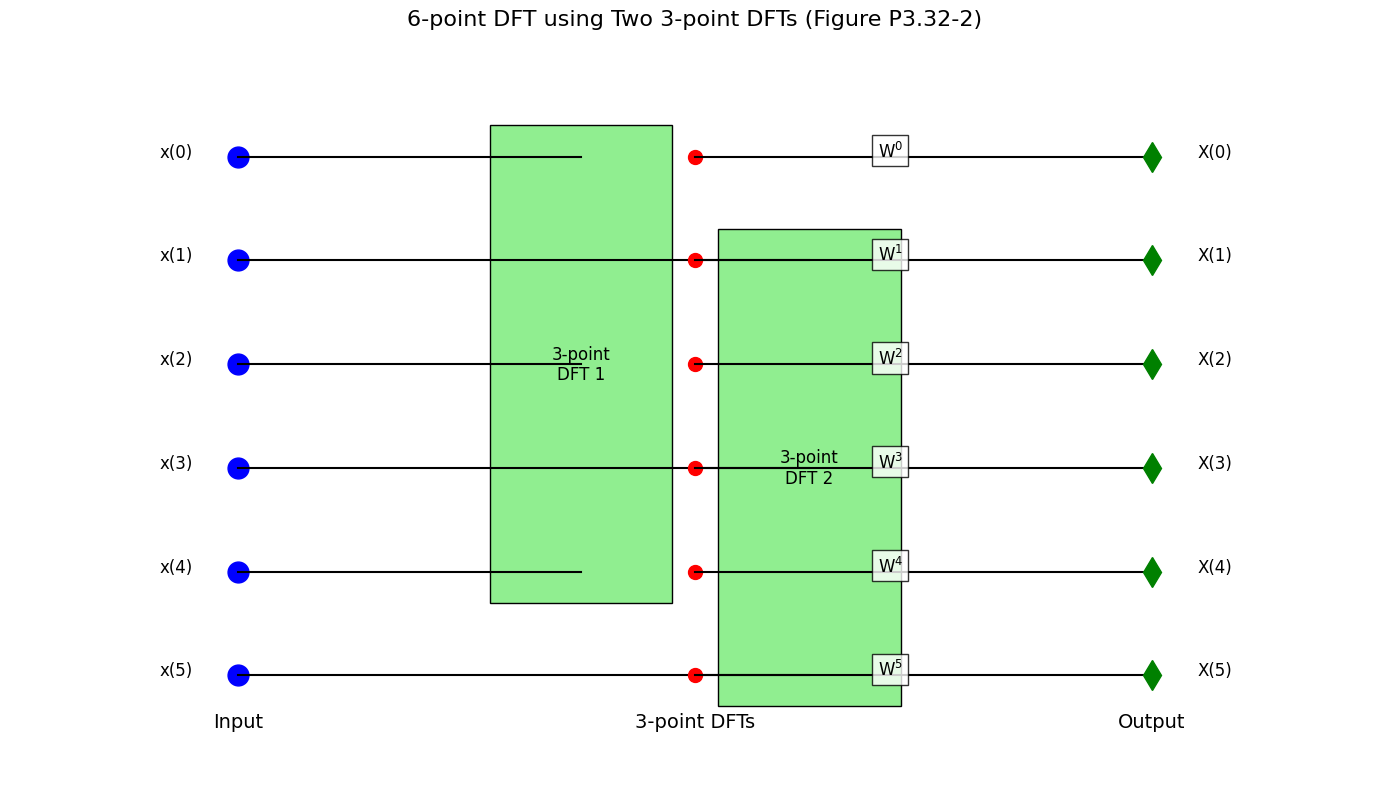

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def draw_figure_p3_32_2():
    # Create figure
    plt.figure(figsize=(14, 8))
    ax = plt.gca()

    # Parameters
    num_points = 6
    stage1_x = 1
    stage2_x = 3
    stage3_x = 5
    y_positions = np.linspace(5, 0, num_points)

    # Draw input nodes
    for i in range(num_points):
        plt.plot(stage1_x, y_positions[i], 'bo', markersize=15)
        plt.text(stage1_x-0.2, y_positions[i], f'x({i})', fontsize=12, ha='right')

    # Draw 3-point DFT blocks
    dft1_x = stage2_x - 0.5
    dft2_x = stage2_x + 0.5

    # First 3-point DFT (x0, x2, x4)
    plt.plot([stage1_x, dft1_x], [y_positions[0], y_positions[0]], 'k-')
    plt.plot([stage1_x, dft1_x], [y_positions[2], y_positions[2]], 'k-')
    plt.plot([stage1_x, dft1_x], [y_positions[4], y_positions[4]], 'k-')

    # Second 3-point DFT (x1, x3, x5)
    plt.plot([stage1_x, dft2_x], [y_positions[1], y_positions[1]], 'k-')
    plt.plot([stage1_x, dft2_x], [y_positions[3], y_positions[3]], 'k-')
    plt.plot([stage1_x, dft2_x], [y_positions[5], y_positions[5]], 'k-')

    # Draw DFT boxes
    dft1_box = plt.Rectangle((dft1_x-0.4, y_positions[4]-0.3), 0.8, y_positions[0]-y_positions[4]+0.6,
                           fc='lightgreen', ec='k')
    dft2_box = plt.Rectangle((dft2_x-0.4, y_positions[5]-0.3), 0.8, y_positions[1]-y_positions[5]+0.6,
                           fc='lightgreen', ec='k')
    ax.add_patch(dft1_box)
    ax.add_patch(dft2_box)
    plt.text(dft1_x, np.mean(y_positions[[0,2,4]]), '3-point\nDFT 1',
            ha='center', va='center', fontsize=12)
    plt.text(dft2_x, np.mean(y_positions[[1,3,5]]), '3-point\nDFT 2',
            ha='center', va='center', fontsize=12)

    # Draw intermediate nodes
    for i in range(num_points):
        plt.plot(stage2_x, y_positions[i], 'ro', markersize=10)

    # Draw combination paths with twiddle factors
    W = np.exp(-2j*np.pi/6)
    for k in range(num_points):
        plt.plot([stage2_x, stage3_x], [y_positions[k], y_positions[k]], 'k-')
        plt.text(stage2_x+0.8, y_positions[k], f'W$^{k}$', fontsize=12,
                bbox=dict(facecolor='white', alpha=0.8))

    # Draw output nodes
    for i in range(num_points):
        plt.plot(stage3_x, y_positions[i], 'gd', markersize=15)
        plt.text(stage3_x+0.2, y_positions[i], f'X({i})', fontsize=12)

    # Add stage labels
    plt.text(stage1_x, -0.5, 'Input', fontsize=14, ha='center')
    plt.text(stage2_x, -0.5, '3-point DFTs', fontsize=14, ha='center')
    plt.text(stage3_x, -0.5, 'Output', fontsize=14, ha='center')

    # Set title and remove axes
    plt.title('6-point DFT using Two 3-point DFTs (Figure P3.32-2)', fontsize=16, pad=20)
    plt.axis('off')
    plt.xlim(0, 6)
    plt.ylim(-1, 6)
    plt.tight_layout()
    plt.show()

draw_figure_p3_32_2()

In [ ]:
import numpy as np

def six_point_dft_via_2point(x):

  x02 = x[0] + x[3]
  x12 = x[0] - x[3]
  x22 = x[1] + x[4]
  x32 = x[1] + x[4]
  x42 = x[2] + x[5]
  x52 = x[2] - x[5]

  W6 = np.exp(-2j * np.pi / 6)
  X = np.zeros(6, dtype=complex)

  X[0] = x02 + x22 + x42
  X[1] = x12 + x32 * W6**1 + x52 * W6**2
  X[2] = x02 + x22 * W6**2 + x42 * W6**4
  X[3] = x12 + x32 * W6**3 + x52 * W6**6
  X[4] = x02 + x22 * W6**4 + x42 * W6**8
  X[5] = x12 + x32 * W6**5 + x52 * W6**10

  return X

x = np.array([1,2,3,4,5,6])
X_correct = np.fft.fft(x)
X_computed = six_point_dft_via_2point(x)

print("input sequence:",x)
print("correct 6-point DFT:",X_correct)
print("computed via three 2-point DFTs:", X_computed)
print("Number of complex multiplications: 6 (3 for the 2-point DFTs and 3 twiddle factors)")

<div dir="rtl" align="right">
9.33. الگوریتم FFT decimation-in-frequency در بخش 9.3 برای ریشه 2، به عنوان مثال، N = 2 توسعه داده شد. یک رویکرد مشابه زمانی که N = 3 به یک الگوریتم radix-3 منجر می شود.

(الف) با استفاده از تجزیه 3×3 DFT، یک نمودار جریان برای یک الگوریتم 9 نقطه ای کاهش در فرکانس رسم کنید.

(ب) برای N 3، چند ضرب مختلط در توان های WN برای محاسبه DFT یک دنباله مختلط نقطه N با استفاده از الگوریتم FFT ریشه-3 در فرکانس مورد نیاز است؟

(ج) برای N = 3، آیا می توان از محاسبات در محل برای الگوریتم ریشه-3 decimation در فرکانس استفاده کرد؟

In [ ]:
import numpy as np
def six_point_dft_via_3point(x):

  x03 = x[0] + x[2] + x[4]
  x13 = x[0] + x[2] + * np.exp(-2j * np.pi * 1/3) + x[4] * np.exp(-2j * np.pi * 2/3)
  x23 = x[0] + x[2] * np.exp(-2j * np.pi * 2/3) + x[4] * np.exp(-2j * np.pi * 4/3)

  x33 = x[1] + x[2] + x[5]
  x43 = x[1] + x[3] * np.exp(-2j * np.pi * 1/3) + x[5] + np.exp(-2j * np.pi * 2/3)
  x53 = x[1] + x[3] * np.exp(-2j * np.pi * 2/3) + x[5] + np.exp(-2j * np.pi * 4/3)

  W6 = np.exp(-2j * np.pi / 6)
  X = np.zeros(6,dtype=complex)

  X[0] = x03 + x33
  X[1] = x13 + x43 * W6**1
  X[2] = x23 + x53 * W6**2
  X[3] = x03 + x33 * np.exp(-2j * np.pi * 3/6)
  X[4] = x13 * x43 * W6**4
  X[5] = x23 + x53 * W6**5

  return X

x = np.array([1,2,3,4,5,6])
X_correct = np.ft.fft(x)
X_computed = six_point_dft_via_3point(x)

print("input sequence:", x)
print("Correct 6-point DFT:",X_correct)
print("Computed via two 3-point DFTs:", X_computed)
print("Number of complex multiplications: 8 (4 for each 3-point DFT)")

<div dir="rtl" align="right">
9.34. دیده‌ایم که یک الگوریتم FFT را می‌توان به عنوان پیوندی از عناصر محاسباتی پروانه در نظر گرفت. به عنوان مثال، پروانه برای الگوریتم FFT decimation-in-frequency radix-2 در شکل P9.34-1 نشان داده شده است. پروانه دو عدد مختلط را به عنوان ورودی می گیرد و دو عدد مختلط را به عنوان خروجی تولید می کند. اجرای آن به ضرب پیچیده در W نیاز دارد، جایی که r یک عدد صحیح است که به مکان پروانه در نمودار جریان الگوریتم بستگی دارد. از آنجایی که ضریب مختلط به شکل W = eje است، می توان از الگوریتم روتاتور CORDIC (رایانه دیجیتال چرخشی مختصات) (به مسئله 9.46 مراجعه کنید) برای اجرای موثر ضرب مختلط استفاده کرد. متأسفانه، در حالی که الگوریتم چرخاننده CORDIC تغییر زاویه مورد نظر را انجام می دهد، همچنین بزرگنمایی ثابتی را ارائه می دهد که مستقل از زاویه 6 است. بنابراین، اگر الگوریتم چرخاننده CORDIC برای پیاده سازی ضرب در W استفاده می شد، پروانه شکل P9.34-1 با شکل ثابت G4 جایگزین می شد. ضریب بزرگنمایی روتاتور CORDIC. (ما هیچ خطایی در تقریب زاویه چرخش فرض نمی‌کنیم.) اگر هر پروانه در نمودار جریان الگوریتم FFT فرکانس در فرکانس با پروانه شکل P9.34-2 جایگزین شود، یک الگوریتم FFT اصلاح شده به دست می‌آوریم که نمودار جریان خروجی N39 برای 4 = 3 نشان داده شده است. این الگوریتم اصلاح شده DFT مورد نظر نخواهد بود.

(الف) نشان دهید که خروجی برای الگوریتم FFT اصلاح شده Y[k] W[k]X[k] است، که در آن X[k] DFT صحیح دنباله ورودی x[n] و W[k] تابعی از G، N و k است.

(ب) دنباله W[k] را می توان با یک قانون ساده توصیف کرد. این قانون را پیدا کنید و وابستگی آن را به G، N و K نشان دهید.

(ج) فرض کنید که می‌خواهیم دنباله ورودی x[n] را برای جبران تأثیر الگوریتم FFT اصلاح‌شده از قبل پردازش کنیم. روشی را برای به دست آوردن یک دنباله î[n] از x[n] تعیین کنید به طوری که اگر [n] ورودی الگوریتم FFT اصلاح شده باشد، آنگاه خروجی X[k] خواهد بود، DFT صحیح دنباله اصلی x[n].

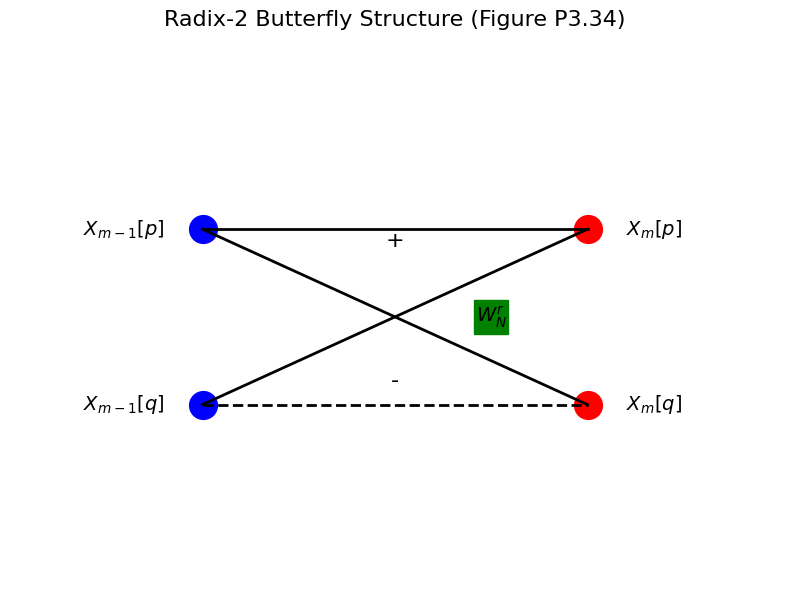

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_radix2_butterfly():
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    # Node positions
    left_x = 1
    right_x = 3
    top_y = 2
    bottom_y = 1

    # Draw nodes
    plt.plot(left_x, top_y, 'bo', markersize=20)  # Xm-1[p]
    plt.plot(left_x, bottom_y, 'bo', markersize=20)  # Xm-1[q]
    plt.plot(right_x, top_y, 'ro', markersize=20)  # Xm[p]
    plt.plot(right_x, bottom_y, 'ro', markersize=20)  # Xm[q]

    # Draw connections
    # Solid lines
    plt.plot([left_x, right_x], [top_y, top_y], 'k-', linewidth=2)  # Xm-1[p] to Xm[p]
    plt.plot([left_x, right_x], [top_y, bottom_y], 'k-', linewidth=2)  # Xm-1[p] to Xm[q]
    plt.plot([left_x, right_x], [bottom_y, top_y], 'k-', linewidth=2)  # Xm-1[q] to Xm[p]

    # Dashed line
    plt.plot([left_x, right_x], [bottom_y, bottom_y], 'k--', linewidth=2)  # Xm-1[q] to Xm[q]

    # Add W_N^r block
    plt.plot(right_x-0.5, (top_y+bottom_y)/2, 'gs', markersize=25)
    plt.text(right_x-0.5, (top_y+bottom_y)/2, r'$W_N^r$',
             fontsize=14, ha='center', va='center')

    # Add labels
    plt.text(left_x-0.2, top_y, r'$X_{m-1}[p]$', fontsize=14, ha='right', va='center')
    plt.text(left_x-0.2, bottom_y, r'$X_{m-1}[q]$', fontsize=14, ha='right', va='center')
    plt.text(right_x+0.2, top_y, r'$X_m[p]$', fontsize=14, ha='left', va='center')
    plt.text(right_x+0.2, bottom_y, r'$X_m[q]$', fontsize=14, ha='left', va='center')

    # Add operation symbols
    plt.text((left_x+right_x)/2, top_y-0.1, '+', fontsize=16, ha='center')
    plt.text((left_x+right_x)/2, bottom_y+0.1, '-', fontsize=16, ha='center')

    plt.title('Radix-2 Butterfly Structure (Figure P3.34)', fontsize=16, pad=20)
    plt.axis('off')
    plt.xlim(0, 4)
    plt.ylim(0, 3)
    plt.tight_layout()
    plt.show()

draw_radix2_butterfly()

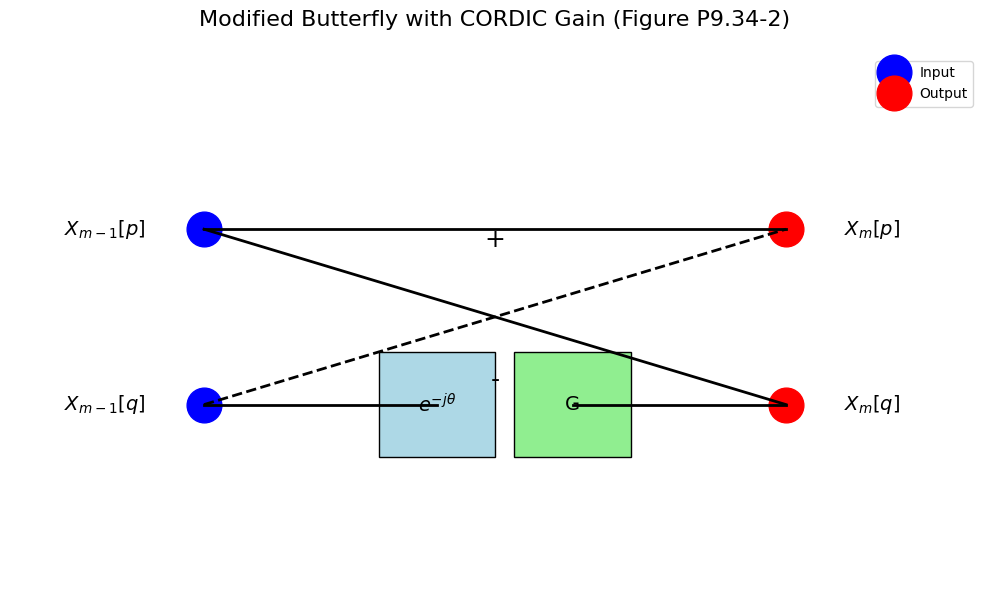

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_cordic_butterfly():
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Node positions
    left_x = 1
    right_x = 4
    top_y = 2
    bottom_y = 1

    # Draw nodes
    plt.plot(left_x, top_y, 'bo', markersize=25, label='Input')  # Xm-1[p]
    plt.plot(left_x, bottom_y, 'bo', markersize=25)  # Xm-1[q]
    plt.plot(right_x, top_y, 'ro', markersize=25, label='Output')  # Xm[p]
    plt.plot(right_x, bottom_y, 'ro', markersize=25)  # Xm[q]

    # Draw connections
    # Top path (no multiplication)
    plt.plot([left_x, right_x], [top_y, top_y], 'k-', linewidth=2)

    # Bottom path with CORDIC components
    mid_x = (left_x + right_x)/2
    plt.plot([left_x, mid_x-0.3], [bottom_y, bottom_y], 'k-', linewidth=2)

    # CORDIC rotation block (angle change)
    cordic_rot = plt.Rectangle((mid_x-0.6, bottom_y-0.3), 0.6, 0.6,
                              fc='lightblue', ec='k')
    ax.add_patch(cordic_rot)
    plt.text(mid_x-0.3, bottom_y, r'$e^{-j\theta}$', fontsize=14,
             ha='center', va='center')

    # CORDIC gain block
    gain_block = plt.Rectangle((mid_x+0.1, bottom_y-0.3), 0.6, 0.6,
                             fc='lightgreen', ec='k')
    ax.add_patch(gain_block)
    plt.text(mid_x+0.4, bottom_y, 'G', fontsize=14, ha='center', va='center')

    plt.plot([mid_x+0.4, right_x], [bottom_y, bottom_y], 'k-', linewidth=2)

    # Cross connection (subtraction path)
    plt.plot([left_x, right_x], [top_y, bottom_y], 'k-', linewidth=2)
    plt.plot([left_x, right_x], [bottom_y, top_y], 'k--', linewidth=2)

    # Add operation symbols
    plt.text((left_x+right_x)/2, top_y-0.1, '+', fontsize=18, ha='center')
    plt.text((left_x+right_x)/2, bottom_y+0.1, '-', fontsize=18, ha='center')

    # Add labels
    plt.text(left_x-0.3, top_y, r'$X_{m-1}[p]$', fontsize=14, ha='right', va='center')
    plt.text(left_x-0.3, bottom_y, r'$X_{m-1}[q]$', fontsize=14, ha='right', va='center')
    plt.text(right_x+0.3, top_y, r'$X_m[p]$', fontsize=14, ha='left', va='center')
    plt.text(right_x+0.3, bottom_y, r'$X_m[q]$', fontsize=14, ha='left', va='center')

    # Add title and legend
    plt.title('Modified Butterfly with CORDIC Gain (Figure P9.34-2)', fontsize=16, pad=20)
    plt.legend(loc='upper right')

    plt.axis('off')
    plt.xlim(0, 5)
    plt.ylim(0, 3)
    plt.tight_layout()
    plt.show()

draw_cordic_butterfly()

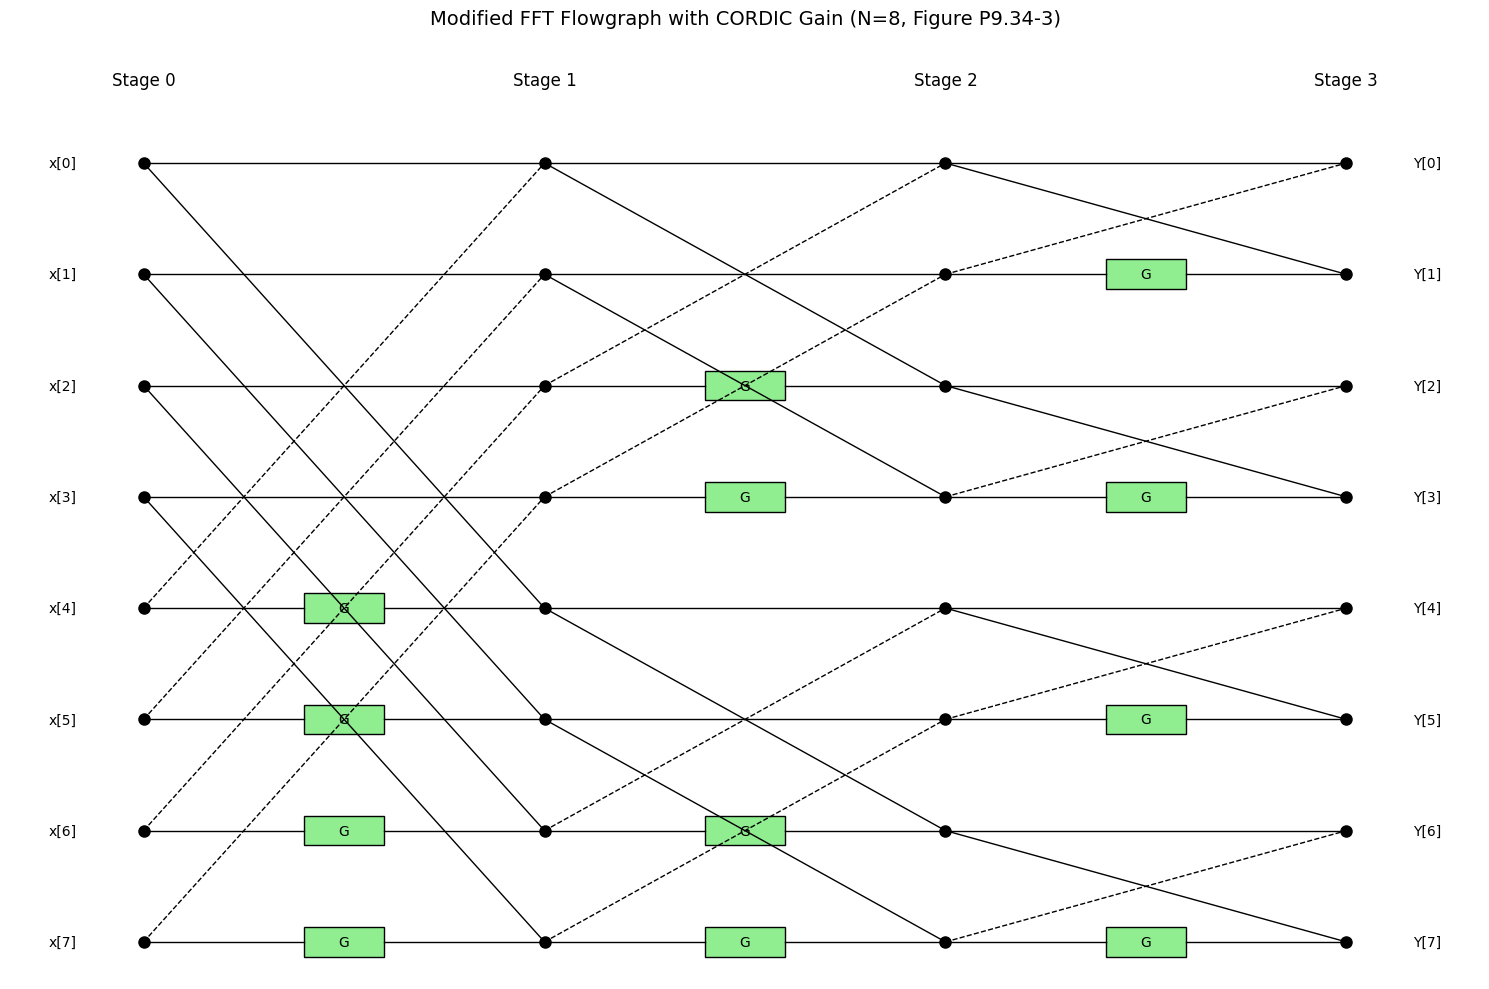

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_modified_fft_flowgraph():
    plt.figure(figsize=(15, 10))
    ax = plt.gca()

    # Parameters
    N = 8
    stages = 3
    x_spacing = 3
    y_spacing = 1.5
    node_radius = 0.15

    # Create stage positions
    stage_x = [i * x_spacing for i in range(stages + 1)]
    node_y = [i * y_spacing for i in range(N-1, -1, -1)]

    # Draw nodes
    for stage in range(stages + 1):
        for node in range(N):
            plt.plot(stage_x[stage], node_y[node], 'ko', markersize=8)

    # Draw butterfly connections with CORDIC gain
    for stage in range(stages):
        span = N // (2 ** (stage + 1))
        for group in range(2 ** stage):
            for k in range(span):
                top_node = group * (2 * span) + k
                bottom_node = top_node + span

                # Draw butterfly connections
                # Top path (direct connection)
                plt.plot([stage_x[stage], stage_x[stage+1]],
                         [node_y[top_node], node_y[top_node]], 'k-', lw=1)

                # Bottom path (with CORDIC gain)
                mid_x = (stage_x[stage] + stage_x[stage+1]) / 2
                plt.plot([stage_x[stage], mid_x-0.3],
                         [node_y[bottom_node], node_y[bottom_node]], 'k-', lw=1)

                # Draw CORDIC gain block
                gain_block = plt.Rectangle((mid_x-0.3, node_y[bottom_node]-0.2),
                                         0.6, 0.4, fc='lightgreen', ec='k')
                ax.add_patch(gain_block)
                plt.text(mid_x, node_y[bottom_node], 'G',
                         ha='center', va='center', fontsize=10)

                plt.plot([mid_x+0.3, stage_x[stage+1]],
                         [node_y[bottom_node], node_y[bottom_node]], 'k-', lw=1)

                # Cross connections
                plt.plot([stage_x[stage], stage_x[stage+1]],
                         [node_y[top_node], node_y[bottom_node]], 'k-', lw=1)
                plt.plot([stage_x[stage], stage_x[stage+1]],
                         [node_y[bottom_node], node_y[top_node]], 'k--', lw=1)

    # Add labels
    for node in range(N):
        plt.text(stage_x[0]-0.5, node_y[node], f'x[{node}]',
                 ha='right', va='center', fontsize=10)
        plt.text(stage_x[-1]+0.5, node_y[node], f'Y[{node}]',
                 ha='left', va='center', fontsize=10)

    # Add stage labels
    for stage in range(stages + 1):
        plt.text(stage_x[stage], node_y[0]+1, f'Stage {stage}',
                 ha='center', va='bottom', fontsize=12)

    # Add title
    plt.title('Modified FFT Flowgraph with CORDIC Gain (N=8, Figure P9.34-3)',
              fontsize=14, pad=20)

    plt.axis('off')
    plt.xlim(stage_x[0]-1, stage_x[-1]+1)
    plt.ylim(node_y[-1]-0.5, node_y[0]+1.5)
    plt.tight_layout()
    plt.show()

draw_modified_fft_flowgraph()

In [ ]:
import numpy as np

def modified_fft(x, G):
    """
    Compute the modified FFT using CORDIC rotators with magnification factor G.

    Parameters:
    x (array): Input sequence of length N (power of 2).
    G (float): Fixed magnification factor introduced by CORDIC.

    Returns:
    array: Modified FFT output Y[k] = W[k] * X[k], where X[k] is the true DFT.
    """
    N = len(x)
    X = np.fft.fft(x)  # True DFT
    k = np.arange(N)
    W = G ** (np.log2(N))  # W[k] = G^{log2(N)} for all k
    Y = W * X  # Modified FFT output
    return Y

def compensate_input(x, G):
    """
    Preprocess the input sequence x[n] to compensate for the modified FFT.

    Parameters:
    x (array): Input sequence of length N (power of 2).
    G (float): Fixed magnification factor introduced by CORDIC.

    Returns:
    array: Preprocessed sequence i[n] such that modified FFT of i[n] gives true DFT of x[n].
    """
    N = len(x)
    compensation_factor = G ** (-np.log2(N))
    i = x * compensation_factor
    return i

# Example usage:
N = 8  # Length of the sequence (power of 2)
x = np.random.rand(N)  # Random input sequence
G = 1.1  # Example magnification factor introduced by CORDIC

# Part (a): Compute the modified FFT output Y[k]
Y = modified_fft(x, G)
print("Modified FFT Output Y[k]:", Y)

# Part (b): The rule for W[k] is W[k] = G^{log2(N)} for all k
log2N = np.log2(N)
W_k = G ** log2N
print("W[k] = G^{log2(N)} =", W_k)

# Part (c): Preprocess the input to get the correct DFT from the modified FFT
i = compensate_input(x, G)
Y_compensated = modified_fft(i, G)
print("Compensated Modified FFT Output (should match true DFT):", Y_compensated)
print("True DFT:", np.fft.fft(x))

<div dir="rtl" align="right">
9.35. این مسئله با محاسبه کارآمد نمونه‌های تبدیل z یک دنباله با طول محدود سروکار دارد. با استفاده از الگوریتم تبدیل صدای جیک، رویه ای را برای محاسبه مقادیر X(z) در 25 نقطه با فاصله یکنواخت روی کمانی دایره ای به شعاع 0.5 ایجاد کنید، که با زاویه 6/7- شروع می شود و به زاویه 3/27 ختم می شود. طول دنباله 100 نمونه است.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_z_transform_samples(x, r=0.5, theta_start=-np.pi/6, theta_end=2*np.pi/3, num_samples=52):
    """
    Compute samples of the z-transform of x[n] on a circular arc.

    Parameters:
    x (array): Input sequence (length N=100).
    r (float): Radius of the circular arc (default: 0.5).
    theta_start (float): Starting angle in radians (default: -π/6).
    theta_end (float): Ending angle in radians (default: 2π/3).
    num_samples (int): Number of samples (default: 52).

    Returns:
    array: Samples of X(z) on the arc.
    array: Angles θ_k corresponding to the samples.
    """
    N = len(x)
    theta_k = np.linspace(theta_start, theta_end, num_samples)  # θ_k values
    z_k = r * np.exp(1j * theta_k)  # z_k = r e^{jθ_k}

    # Compute X(z_k) = sum_{n=0}^{N-1} x[n] z_k^{-n}
    X_z = np.zeros(num_samples, dtype=np.complex128)
    for k in range(num_samples):
        X_z[k] = np.sum(x * (z_k[k] ** -np.arange(N)))

    return X_z, theta_k

# Example usage:
N = 100  # Length of the sequence
x = np.random.rand(N)  # Random input sequence (replace with actual data)

# Compute z-transform samples on the arc
X_z, theta_k = compute_z_transform_samples(x, r=0.5, theta_start=-np.pi/6, theta_end=2*np.pi/3, num_samples=52)

# Plot the magnitude of X(z) on the arc
plt.figure(figsize=(10, 5))
plt.plot(theta_k, np.abs(X_z), 'b-', marker='o', markersize=4)
plt.title("Magnitude of X(z) on Circular Arc (r=0.5)")
plt.xlabel("Angle θ (radians)")
plt.ylabel("|X(z)|")
plt.grid(True)
plt.show()

# Plot the phase of X(z) on the arc
plt.figure(figsize=(10, 5))
plt.plot(theta_k, np.angle(X_z), 'r-', marker='o', markersize=4)
plt.title("Phase of X(z) on Circular Arc (r=0.5)")
plt.xlabel("Angle θ (radians)")
plt.ylabel("Phase (radians)")
plt.grid(True)
plt.show()

<div dir="rtl" align="right">
9.36. دنباله ای 1024 نقطه ای x[n] را در نظر بگیرید که با به هم پیوستن دو دنباله 512 نقطه ای Xe[n] و xo[n] ساخته شده است. به طور خاص

<div dir="rtl" align="left">
Xe[n/2], if n = 0, 2, 4, ..., 1022

x[n] xo[(n-1)/2], if n = 1, 3, 5, ..., 1023
<div dir="rtl" align="right">
0، برای n خارج از محدوده 0 ≤ n ≤ 1023

فرض کنید X[k] نشان دهنده DFT 1024 نقطه ای x[n] و Xe[k] و Xo[k] به ترتیب نشان دهنده DFT های 512 نقطه ای xe[n] و xo[n] است. با توجه به X[k]، ما می‌خواهیم Xe[k] را از X[k] به روش محاسباتی کارآمد به دست آوریم که در آن کارایی محاسباتی بر حسب تعداد کل ضرب‌های مختلط و جمع‌های مورد نیاز اندازه‌گیری می‌شود. یک رویکرد نه چندان کارآمد همانطور که در شکل P9.36 نشان داده شده است

برای به دست آوردن Xe[k] از X[k] کارآمدترین الگوریتمی را که می توانید (مطمئنا کارآمدتر از نمودار بلوکی شکل P9.36) مشخص کنید.

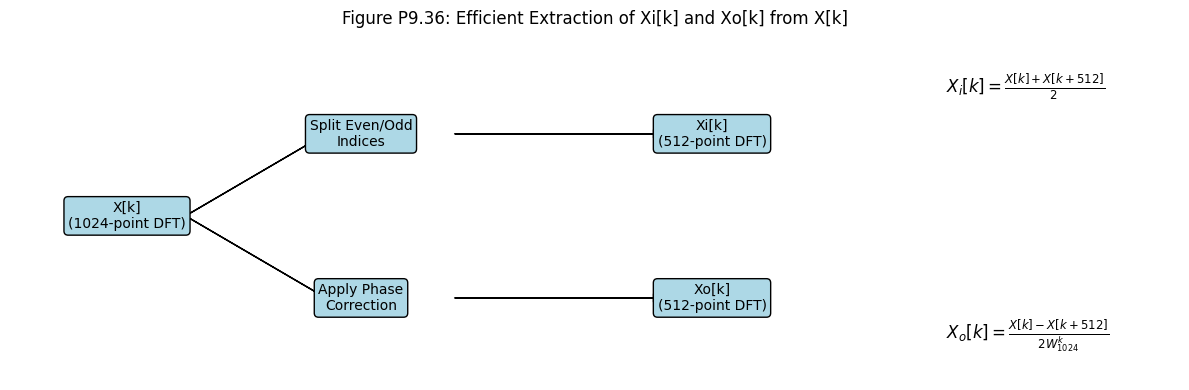

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrow

def draw_figure_9_36():
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 4)
    ax.axis('off')
    ax.set_title("Figure P9.36: Efficient Extraction of Xi[k] and Xo[k] from X[k]", pad=20)

    # Blocks
    box_style = {'facecolor': 'lightblue', 'edgecolor': 'black', 'boxstyle': 'round'}
    text_style = {'ha': 'center', 'va': 'center', 'fontsize': 10}

    # Input X[k]
    ax.text(1, 2, 'X[k]\n(1024-point DFT)', **text_style, bbox=box_style)

    # Split even and odd
    ax.text(3, 3, 'Split Even/Odd\nIndices', **text_style, bbox=box_style)
    ax.text(3, 1, 'Apply Phase\nCorrection', **text_style, bbox=box_style)

    # Output Xi[k] and Xo[k]
    ax.text(6, 3, 'Xi[k]\n(512-point DFT)', **text_style, bbox={'facecolor': 'lightgreen', **box_style})
    ax.text(6, 1, 'Xo[k]\n(512-point DFT)', **text_style, bbox={'facecolor': 'salmon', **box_style})

    # Arrows
    arrow_style = {'head_width': 0.1, 'head_length': 0.2, 'fc': 'k', 'ec': 'k'}
    ax.arrow(1.5, 2, 1.2, 1, **arrow_style)
    ax.arrow(1.5, 2, 1.2, -1, **arrow_style)
    ax.arrow(3.8, 3, 1.7, 0, **arrow_style)
    ax.arrow(3.8, 1, 1.7, 0, **arrow_style)

    # Equations
    ax.text(8, 3.5, r'$X_i[k] = \frac{X[k] + X[k+512]}{2}$', fontsize=12)
    ax.text(8, 0.5, r'$X_o[k] = \frac{X[k] - X[k+512]}{2W_{1024}^k}$', fontsize=12)

    plt.tight_layout()
    plt.show()

draw_figure_9_36()

In [ ]:
import numpy as np

def extract_Xi_and_Xo(X):
    """
    Extract Xi[k] and Xo[k] (512-point DFTs) from X[k] (1024-point DFT).

    Parameters:
    X (array): 1024-point DFT of the interleaved sequence x[n].

    Returns:
    Xi (array): 512-point DFT of x_i[n].
    Xo (array): 512-point DFT of x_o[n].
    """
    N = len(X)
    assert N == 1024, "Input DFT length must be 1024."

    # Split X[k] into even and odd parts
    X_even = X[:512]  # X[k] for k = 0, 1, ..., 511
    X_odd = X[512:]   # X[k] for k = 512, ..., 1023

    # Compute Xi[k] and Xo[k]
    Xi = (X_even + X_odd) / 2
    W = np.exp(-2j * np.pi * np.arange(512) / 1024)
    Xo = (X_even - X_odd) / (2 * W)

    return Xi, Xo

# Example usage:
# Generate random 512-point sequences x_i[n] and x_o[n]
x_i = np.random.rand(512)
x_o = np.random.rand(512)

# Construct the interleaved sequence x[n] of length 1024
x = np.zeros(1024, dtype=complex)
x[0::2] = x_i  # Even indices: x_i[n/2]
x[1::2] = x_o  # Odd indices: x_o[(n-1)/2]

# Compute 1024-point DFT of x[n]
X = np.fft.fft(x)

# Extract Xi[k] and Xo[k]
Xi, Xo = extract_Xi_and_Xo(X)

# Verify the results by comparing with direct DFTs of x_i and x_o
Xi_direct = np.fft.fft(x_i)
Xo_direct = np.fft.fft(x_o)

print("Error in Xi:", np.max(np.abs(Xi - Xi_direct)))
print("Error in Xo:", np.max(np.abs(Xo - Xo_direct)))